In [26]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import warnings        
warnings.filterwarnings("ignore")

In [27]:
df= pd.read_csv("D:\\datasets\\usa_housing\\USA_Housing.csv")

In [28]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [30]:
import seaborn as sns

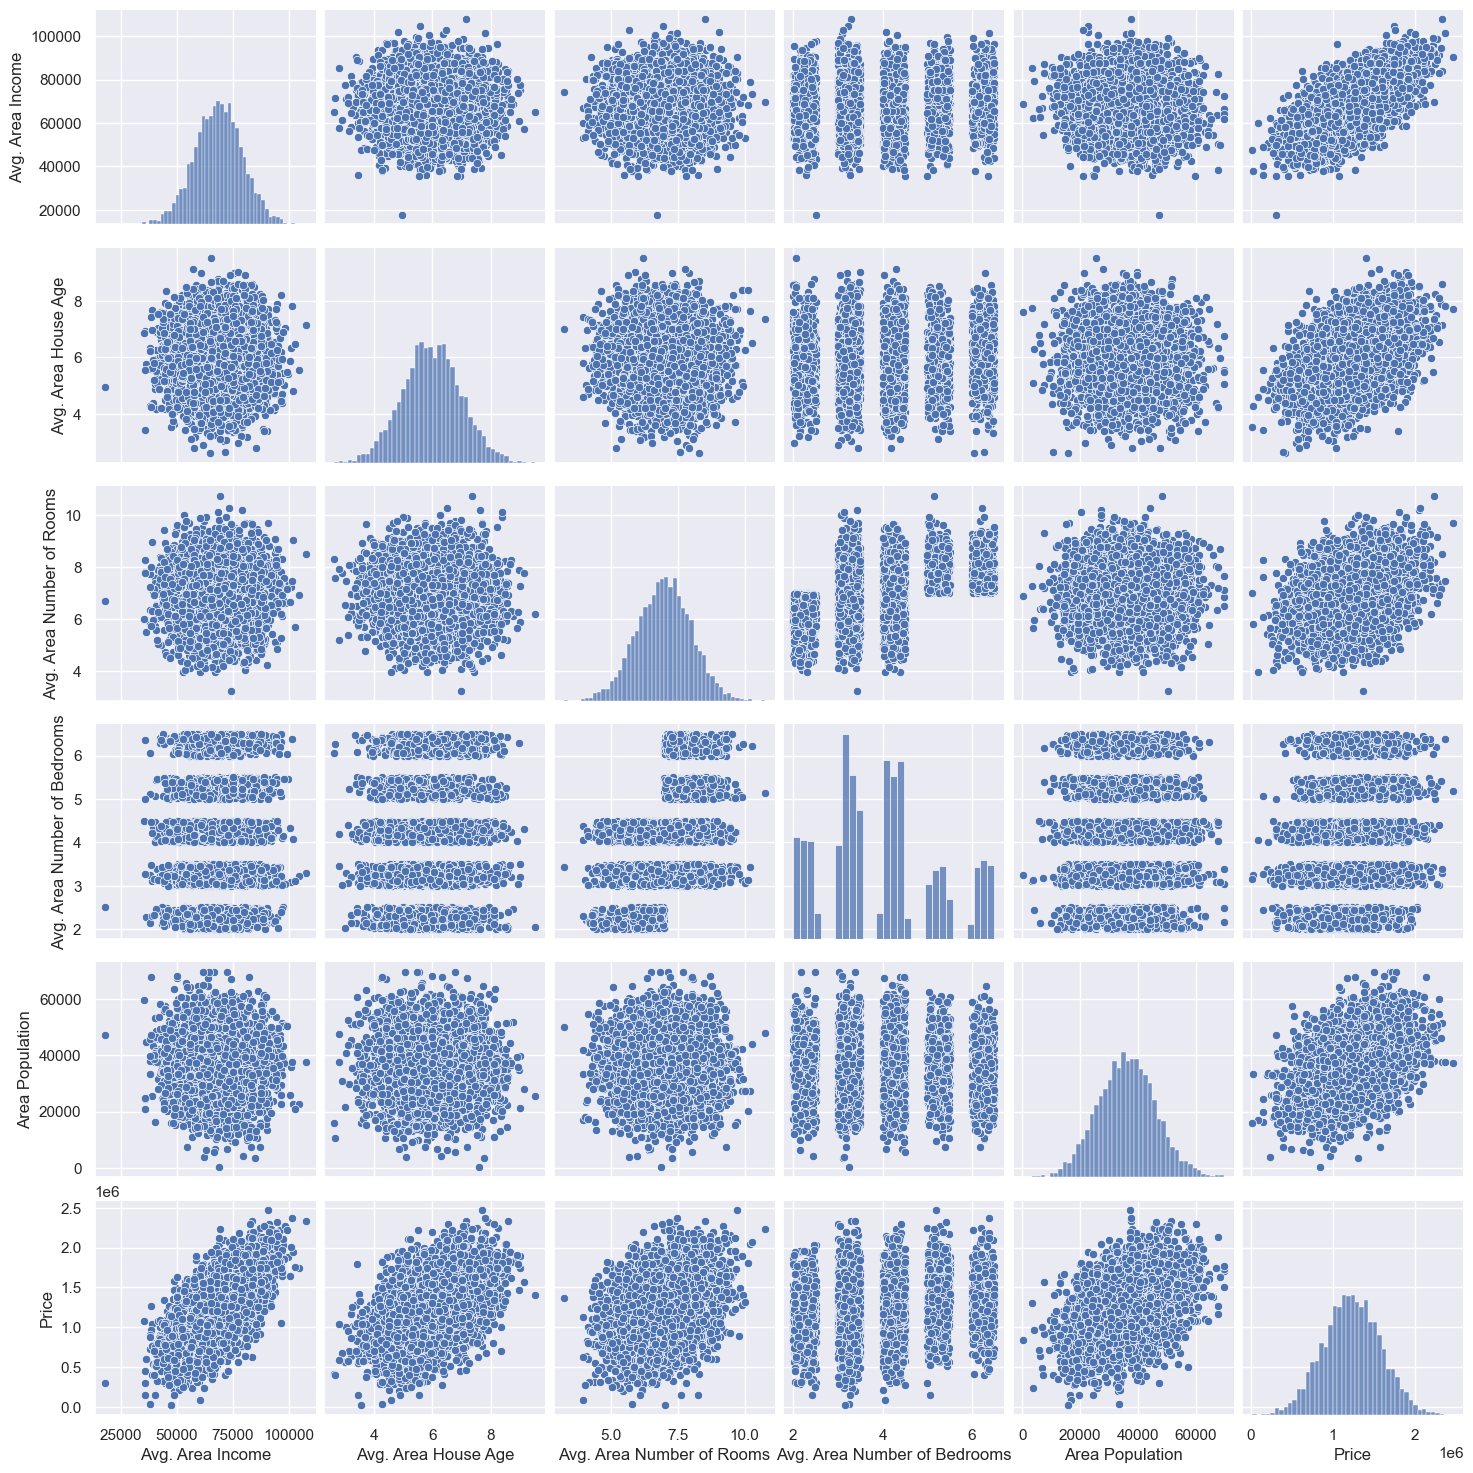

In [31]:
sns.pairplot(data=df)

In [32]:
df.isna()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


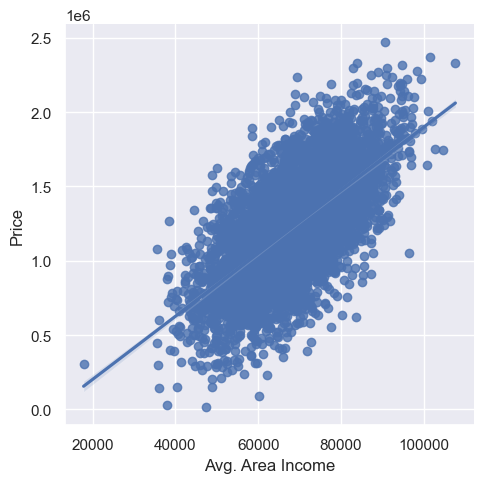

In [33]:
x,y = df['Avg. Area Income'], df['Price']
sns.set(color_codes=True)
sns.lmplot(x='Avg. Area Income',y='Price',data=df)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
x=df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y= df[['Price']]

In [36]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=101)

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(x_train,y_train)

LinearRegression()

In [39]:
lm.coef_

array([[2.16176350e+01, 1.65221120e+05, 1.21405377e+05, 1.31871878e+03,
        1.52251955e+01]])

In [40]:
p=lm.predict(x_test)

Text(0, 0.5, 'predictions')

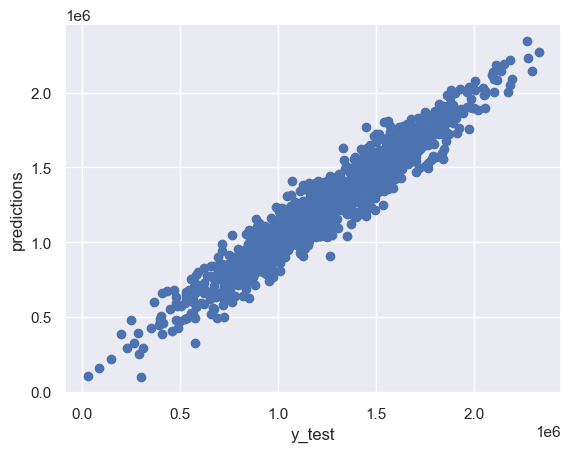

In [41]:
plt.scatter(y_test,p,marker='o')
plt.xlabel('y_test')
plt.ylabel('predictions')

In [42]:
lit=[[79000,9,10,6,23000]]
inp = pd.DataFrame(lit)
inp
prd = lm.predict(lit)
print(prd)

[[2125556.15108465]]


In [43]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_test,p), 2))

R2 score = 0.92


<Axes: ylabel='Density'>

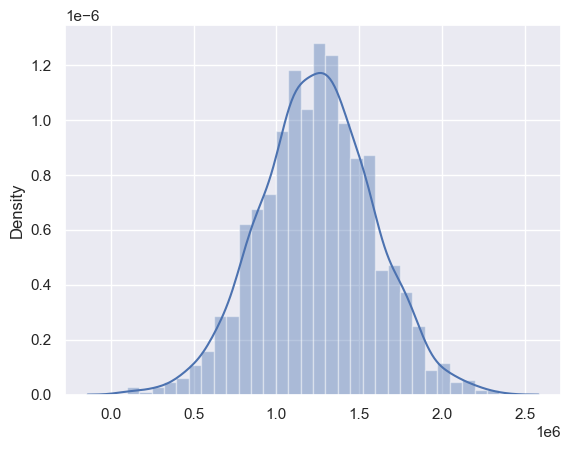

In [44]:
sns.distplot((p))